In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.4')
emcee_run = EmceeRun(emcee_file)

In [3]:
emcee_run.set_best_params(discard=150)
best_params = emcee_run.get_best_params()

In [4]:
plotter = Plotter(bgs, emcee_run)
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

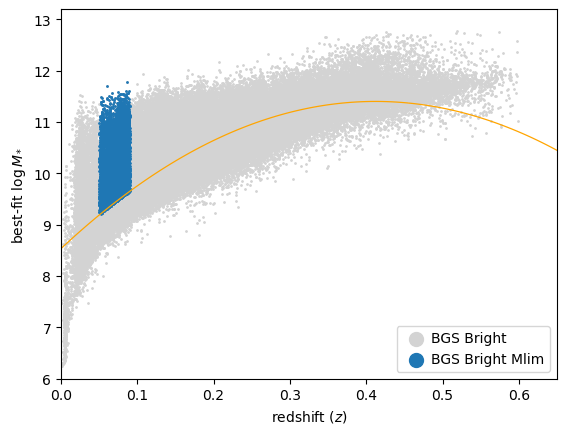

In [5]:
plotter.plot_selected_data(0.05, 0.09)

/Users/federico/Library/CloudStorage/OneDrive-UniversityCollegeLondon/PhD/PhD_project/bgs_psmf/nb/../VMaxDensity.py:19: RuntimeWarning: divide by zero encountered in divide
  _w = self.w_spec / (self.vmax.clip(v_zmin, v_zmax) - v_zmin)


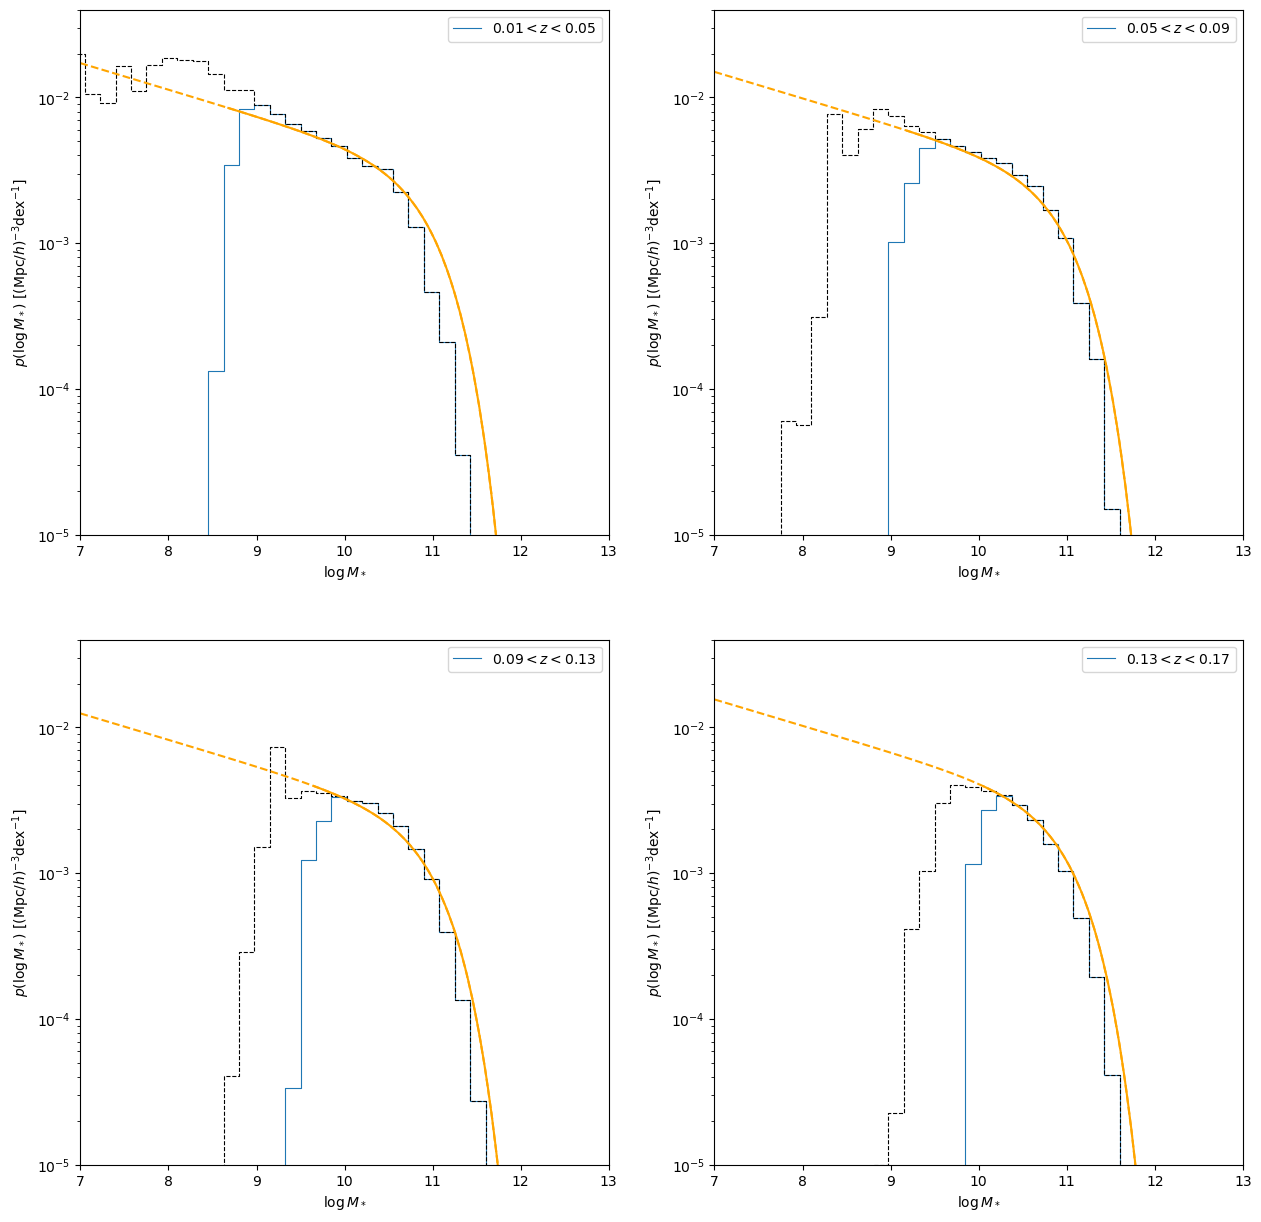

In [6]:
zmins = np.array([0.01 + 0.04 * i for i in range(4)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(4)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,15))

plot_params_ext = {'color': 'orange', 'linestyle':'--'}
plot_params = {'color':'orange', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(4), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(2,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)

    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)
    # print(z_smf.mlim.min())
    plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin}< z <{zmax:.2f}$'})
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    plt.legend(loc='best')
plt.show()

    

    
    
    